<h1><center>DSA 4212: Year 2022</center></h1>

<h4><center> Group Number: 32  </center></h4>
<h4><center> Group Member 1: Cui Guangyu, A0204843J </center></h4>
<h4><center> Group Member 2: Wong Zea Teng, A0204680L </center></h4>
<h4><center> Group Member 3: Zheng Jingwen, A0205034X </center></h4>


# Loading Libraries

In [ ]:
import imageio
import os
import pandas as pd
import time
import cv2

%matplotlib inline
from jax.config import config
config.update("jax_enable_x64", True) # for higher accuracy

import jax
import jax.numpy as np

import pylab as plt
import numpy as onp

from skimage.transform import rescale, resize, downscale_local_mean

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from keras.preprocessing.image import array_to_img

In [ ]:
onp.random.seed(4212)

# Loading Data(pls change this)

In [ ]:
#if needed
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
# mount the Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# MODIFY path when necessary
!ls /content/drive/MyDrive/DSA4212

 assignment_1_32.gdoc	    'Copy of Feature Extraction.ipynb'
 assignment_1_celeba.ipynb  'Feature Extraction.ipynb'
 assignment1_final	     img_celeba_small
 assignment_1_task7.ipynb    img_celeba_small.zip
 Assignment2.gdoc	     备胎1.ipynb
 celeba.csv		     备胎2.ipynb


In [ ]:
# let's unzip the data (takes a bit of time, be patient) in the same directory
# It takes a few minutes (but only needs to be done once) -- roughly unzip 100 files per seconds
# !unzip /content/drive/MyDrive/DSA4212/img_celeba_small.zip  -d  /content/drive/MyDrive/DSA4212

In [ ]:
#let us list all the files in the image directory
path = "/content/drive/MyDrive/DSA4212/img_celeba_small/"
all_img = [f for f in os.listdir(path)
                 if os.path.isfile(os.path.join(path, f))
                 and f.endswith(".jpg")]

# sort the images by alphabetical order
# !!!! VERY IMPORTANT in order to be consistent with the labels contained in celeba.csv !!!!
all_img.sort()
nb_img = len(all_img)
print("Number of images:", nb_img)

Number of images: 20000


In [ ]:
#load attributes csv file
path_csv  = "/content/drive/MyDrive/DSA4212/"
attribute = pd.read_csv(os.path.join(path_csv, "celeba.csv"))

In [ ]:
#let us list all the files in the image directory
path = "/content/drive/MyDrive/DSA4212/img_celeba_small/"
all_img = [f for f in os.listdir(path)
                 if os.path.isfile(os.path.join(path, f))
                 and f.endswith(".jpg")]

# sort the images by alphabetical order
# !!!! VERY IMPORTANT in order to be consistent with the labels contained in celeba.csv !!!!
all_img.sort()
nb_img = len(all_img)
print("Number of images:", nb_img)

#let us keep only the relevant attributes
attribute = attribute[:20000]

Number of images: 20000


# Baseline model: Logistic Regression with black and white, resolution 100x100



In [ ]:
train_img_array = onp.zeros((15000, 100,100))
for k in range(15000):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = resize(im, (100,100) )
    im = onp.mean(im, axis=2)
    train_img_array[k,:,:] = im
test_img_array = onp.zeros((5000, 100,100))
for l in range(15000,20000):
    im2 = imageio.imread(os.path.join(path, all_img[l])).astype(float)
    im2 = resize(im2, (100,100) )
    im2 = onp.mean(im2, axis=2)
    test_img_array[l-15000,:,:] = im2

In [ ]:
y_train=[]
for k in range(15000):
   y_train.insert(k,attribute["Male"][k])
y_train=np.asarray(y_train)

In [ ]:
y_test=[]
for l in range(15000,20000):
  y_test.insert(l,attribute["Male"][l])
y_test=np.asarray(y_test)

In [ ]:
number_of_train = train_img_array.shape[0]
x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])

In [ ]:
number_of_test = test_img_array.shape[0]
x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])

In [ ]:
x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test.T
y_train = y_train.T

In [ ]:
x_train_flatten.shape

(15000, 10000)

In [ ]:
y_train.shape

(15000,)

In [ ]:
logreg = LogisticRegression(fit_intercept = False, C = 1)

In [ ]:
model_log = logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)
print("====================Train=============================")
mnb_score = accuracy_score(y_train, y_train_pred)
auc_score = roc_auc_score(y_train,y_train_pred)
print(mnb_score, auc_score)
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("====================Test=============================")
mnb_score = accuracy_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test,y_test_pred)
print(mnb_score, auc_score)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

====================Train=============================
0.9287333333333333 0.9255467937631054
              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      8668
           1       0.92      0.91      0.91      6332

    accuracy                           0.93     15000
   macro avg       0.93      0.93      0.93     15000
weighted avg       0.93      0.93      0.93     15000

[[8200  468]
 [ 601 5731]]
====================Test=============================
0.9054 0.9008932866211139
              precision    recall  f1-score   support

          -1       0.91      0.93      0.92      2901
           1       0.90      0.87      0.89      2099

    accuracy                           0.91      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.91      0.91      0.91      5000

[[2695  206]
 [ 267 1832]]


# Feature Explorations

## Logistic regression with varying training size

In [ ]:
x_train_full = onp.zeros((15000, 100, 100))
for k in range(15000):
  im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
  im = resize(im, (100,100) )
  im = onp.mean(im, axis=2)
  x_train_full[k,:,:] = im

x_test_full = onp.zeros((5000, 100,100))
for l in range(15000,20000):
  im2 = imageio.imread(os.path.join(path, all_img[l])).astype(float)
  im2 = resize(im2, (100,100) )
  im2 = onp.mean(im2, axis=2)
  x_test_full[l-15000,:,:] = im2

y_train_full=[]
for k in range(15000):
  y_train_full.insert(k,attribute["Male"][k])
y_train_full = np.asarray(y_train_full)

y_test_full=[]
for l in range(15000,20000):
  y_test_full.insert(l,attribute["Male"][l])
y_test_full = np.asarray(y_test_full)

In [ ]:
def logreg_train(size = 15000, x_ = x_train_full, y_ = y_train_full,  x_test_ = x_test_full, y_test_ = y_test_full):
  y_train_= y_train_full[:size]

  x_train_ = x_[:size]
  number_of_train = x_train_.shape[0]
  x_train_flatten = x_train_.reshape(number_of_train,x_train_.shape[1]*x_train_.shape[2])

  number_of_test = x_test_.shape[0]
  x_test_flatten = x_test_.reshape(number_of_test,x_test_.shape[1]*x_test_.shape[2])
  x_train = x_train_flatten
  x_test = x_test_flatten
  y_test_ = y_test_full.T
  y_train_ = y_train_.T

  logregg = LogisticRegression(fit_intercept = False, C = 1, max_iter = 5000, solver = 'liblinear')

  model_log = logregg.fit(x_train, y_train_)
  y_test_pred = logregg.predict(x_test)
  accuracy = accuracy_score(y_test_, y_test_pred)
  return accuracy

In [ ]:
train_sizes = list(range(1000, 15001, 1000))

In [ ]:
accuracy = []
for i in train_sizes:
  accuracy.append(logreg_train(size = i))

In [ ]:
plt.plot(train_sizes,accuracy)
plt.title('Test Accuracy VS Training size')
plt.xlabel('Training size')
plt.ylabel('Test Accuracy')
#plt.ylim([0.8,0.9])
plt.show()

## Logreg with varying resolution

In [ ]:
y_train=[]
for k in range(6000):
   y_train.insert(k,attribute["Male"][k])
y_train=np.asarray(y_train)

y_test=[]
for l in range(18000,20000):
  y_test.insert(l,attribute["Male"][l])
y_test=np.asarray(y_test)

In [ ]:
def logreg_train_res(y_ = y_train, y_test_ = y_test, resolution = 100): #y values are the same

  x_train_ = onp.zeros((6000, resolution,resolution))
  for k in range(6000):
      im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
      im = resize(im, (resolution,resolution) )
      im = onp.mean(im, axis=2)
      x_train_[k,:,:] = im

  x_test_ = onp.zeros((2000, resolution,resolution))
  for l in range(18000,20000):
      im2 = imageio.imread(os.path.join(path, all_img[l])).astype(float)
      im2 = resize(im2, (resolution,resolution) )
      im2 = onp.mean(im2, axis=2)
      x_test_[l-18000,:,:] = im2

  number_of_train = x_train_.shape[0]
  x_train_flatten = x_train_.reshape(number_of_train,x_train_.shape[1]*x_train_.shape[2])

  number_of_test = x_test_.shape[0]
  x_test_flatten = x_test_.reshape(number_of_test,x_test_.shape[1]*x_test_.shape[2])
  x_train = x_train_flatten
  x_test = x_test_flatten
  y_test_ = y_test_.T
  y_train_ = y_.T

  logregg = LogisticRegression(fit_intercept = False, C = 1, max_iter = 5000, solver = 'liblinear')

  model_log = logregg.fit(x_train, y_train_)
  y_test_pred = logregg.predict(x_test)
  accuracy = accuracy_score(y_test_, y_test_pred)
  return accuracy

In [ ]:
resolution = list(range(25, 178, 25))
acc = []

In [ ]:
for i in resolution:
  acc.append(logreg_train_res(resolution = i))

In [ ]:
plt.plot(resolution,acc)
plt.title('Image Resolution VS Training size')
plt.xlabel('Image Resolution')
plt.ylabel('Test Accuracy')
#plt.ylim([0.8,0.9])
plt.show()

## Logistic Regressions with colored scale and increasing contrasts

In [ ]:
logreg = LogisticRegression(fit_intercept = False, C = 1, max_iter = 5000)

train_img_array = onp.zeros((15000, 100,100,3))
for k in range(15000):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = resize(im, (100,100))
    train_img_array[k,:,:,:] = im
test_img_array = onp.zeros((5000, 100,100,3))
for l in range(15000,20000):
    im2 = imageio.imread(os.path.join(path, all_img[l])).astype(float)
    im2 = resize(im2, (100,100) )
    test_img_array[l-15000,:,:,:] = im2

y_train=[]
for k in range(15000):
  y_train.insert(k,attribute["Male"][k])
y_train=np.asarray(y_train)

y_test=[]
for l in range(15000,20000):
  y_test.insert(l,attribute["Male"][l])
y_test=np.asarray(y_test)

number_of_train = train_img_array.shape[0]
x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2]*3)

number_of_test = test_img_array.shape[0]
x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2]*3)

x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test.T
y_train = y_train.T

model_log = logreg.fit(x_train, y_train)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)
print("====================Train=============================")
mnb_score = accuracy_score(y_train, y_train_pred)
auc_score = roc_auc_score(y_train,y_train_pred)
print(mnb_score, auc_score)
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("====================Test=============================")
mnb_score = accuracy_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test,y_test_pred)
print(mnb_score, auc_score)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

====================Train=============================
1.0 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      8668
           1       1.00      1.00      1.00      6332

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[8668    0]
 [   0 6332]]
====================Test=============================
0.914 0.9108069879141738
              precision    recall  f1-score   support

          -1       0.92      0.93      0.93      2901
           1       0.90      0.89      0.90      2099

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000

[[2700  201]
 [ 229 1870]]


## Logistic Regression with increasing contrasts for black and white images

In [ ]:
def contrast(img,c,b):
  rows,cols,chunnel = img.shape
  blank = onp.zeros([rows,cols,chunnel],img.dtype)
  dst = cv2.addWeighted(img, c, blank, 1-c, b)
  return dst

In [ ]:
logreg = LogisticRegression(fit_intercept = False, solver = 'liblinear', C = 1, max_iter = 3000)

def predict_by_diff_contrast_bw(x):
  train_img_array = onp.zeros((6000, 100,100))
  for k in range(6000):
      im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
      im = resize(im, (100,100) )
      im = contrast(im,x,0)
      im = onp.mean(im, axis=2)
      train_img_array[k,:,:] = im
  test_img_array = onp.zeros((2000, 100,100))
  for l in range(18000,20000):
      im2 = imageio.imread(os.path.join(path, all_img[l])).astype(float)
      im2 = resize(im2, (100,100) )
      im2 = contrast(im2,x,0)
      im2 = onp.mean(im2, axis=2)
      test_img_array[l-18000,:,:] = im2

  y_train=[]
  for k in range(6000):
    y_train.insert(k,attribute["Male"][k])
  y_train=np.asarray(y_train)

  y_test=[]
  for l in range(18000,20000):
    y_test.insert(l,attribute["Male"][l])
  y_test=np.asarray(y_test)

  number_of_train = train_img_array.shape[0]
  x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])

  number_of_test = test_img_array.shape[0]
  x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])

  x_train = x_train_flatten
  x_test = x_test_flatten
  y_test = y_test.T
  y_train = y_train.T

  model_log = logreg.fit(x_train, y_train)

  y_train_pred = logreg.predict(x_train)
  y_test_pred = logreg.predict(x_test)
  mnb_score = accuracy_score(y_train, y_train_pred)
  auc_score = roc_auc_score(y_train,y_train_pred)
  accuracy = accuracy_score(y_test, y_test_pred)
  auc_score_test = roc_auc_score(y_test,y_test_pred)

  return accuracy

In [ ]:
contrast_list = [0.5,0.75,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
accuracy_contrast_bw =[]
for i in contrast_list:
  accuracy_contrast_bw.append(predict_by_diff_contrast_bw(i))

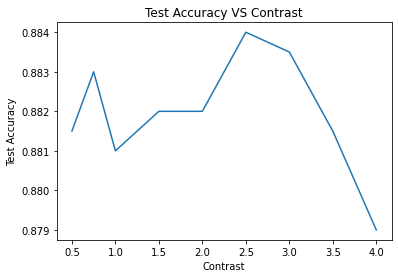

In [ ]:
plt.plot(contrast_list,accuracy_contrast_bw)
plt.title('Test Accuracy VS Contrast')
plt.xlabel('Contrast')
plt.ylabel('Test Accuracy')
plt.show()

## Logistic Regression with increasing contrasts for colored images

In [ ]:
logreg = LogisticRegression(fit_intercept = False, solver = 'liblinear', C = 1, max_iter = 3000)

def predict_by_diff_contrast(x):
  train_img_array = onp.zeros((6000, 100,100,3))
  for k in range(6000):
      im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
      im = resize(im, (100,100) )
      im = contrast(im,x,0)
      train_img_array[k,:,:,:] = im
  test_img_array = onp.zeros((2000, 100,100,3))
  for l in range(18000,20000):
      im2 = imageio.imread(os.path.join(path, all_img[l])).astype(float)
      im2 = resize(im2, (100,100) )
      im2 = contrast(im2,x,0)
      test_img_array[l-18000,:,:,:] = im2

  y_train=[]
  for k in range(6000):
    y_train.insert(k,attribute["Male"][k])
  y_train=np.asarray(y_train)

  y_test=[]
  for l in range(18000,20000):
    y_test.insert(l,attribute["Male"][l])
  y_test=np.asarray(y_test)

  number_of_train = train_img_array.shape[0]
  x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2]*3)

  number_of_test = test_img_array.shape[0]
  x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2]*3)

  x_train = x_train_flatten
  x_test = x_test_flatten
  y_test = y_test.T
  y_train = y_train.T

  model_log = logreg.fit(x_train, y_train)

  y_train_pred = logreg.predict(x_train)
  y_test_pred = logreg.predict(x_test)
  mnb_score = accuracy_score(y_train, y_train_pred)
  auc_score = roc_auc_score(y_train,y_train_pred)
  accuracy = accuracy_score(y_test, y_test_pred)
  auc_score_test = roc_auc_score(y_test,y_test_pred)

  return accuracy

In [ ]:
contrast_list = [0.5,0.75,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
accuracy_contrast =[]
for i in contrast_list:
  accuracy_contrast.append(predict_by_diff_contrast(i))

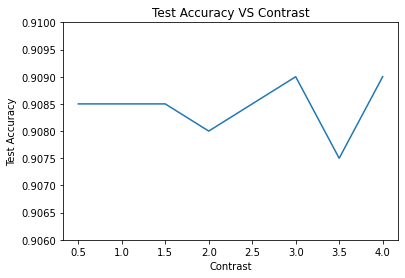

In [ ]:
plt.plot(contrast_list,accuracy_contrast)
plt.title('Test Accuracy VS Contrast')
plt.xlabel('Contrast')
plt.ylabel('Test Accuracy')
plt.ylim([0.9060,0.91])
plt.show()

## Logistic Regression with varying brightness for b&w images

In [ ]:
def brightness(img,c,b):
  rows,cols,chunnel = img.shape
  blank = onp.zeros([rows,cols,chunnel],img.dtype)
  dst = cv2.addWeighted(img, c, blank, 1-c, b)
  return dst

In [ ]:
logreg = LogisticRegression(fit_intercept = False, solver = 'liblinear', C = 1, max_iter = 3000)

def predict_by_diff_brightness_bw(x):
  train_img_array = onp.zeros((4000, 100,100))
  for k in range(4000):
      im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
      im = resize(im, (100,100) )
      im = brightness(im,1.0,x)
      im = onp.mean(im, axis=2)
      train_img_array[k,:,:] = im
  test_img_array = onp.zeros((2000, 100,100))
  for l in range(18000,20000):
      im2 = imageio.imread(os.path.join(path, all_img[l])).astype(float)
      im2 = resize(im2, (100,100) )
      im2 = brightness(im2,1.0,x)
      im2 = onp.mean(im2, axis=2)
      test_img_array[l-18000,:,:] = im2

  y_train=[]
  for k in range(4000):
    y_train.insert(k,attribute["Male"][k])
  y_train=np.asarray(y_train)

  y_test=[]
  for l in range(18000,20000):
    y_test.insert(l,attribute["Male"][l])
  y_test=np.asarray(y_test)

  number_of_train = train_img_array.shape[0]
  x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])

  number_of_test = test_img_array.shape[0]
  x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])

  x_train = x_train_flatten
  x_test = x_test_flatten
  y_test = y_test.T
  y_train = y_train.T

  model_log = logreg.fit(x_train, y_train)

  y_train_pred = logreg.predict(x_train)
  y_test_pred = logreg.predict(x_test)
  mnb_score = accuracy_score(y_train, y_train_pred)
  auc_score = roc_auc_score(y_train,y_train_pred)
  accuracy = accuracy_score(y_test, y_test_pred)
  auc_score_test = roc_auc_score(y_test,y_test_pred)

  return accuracy

In [ ]:
brightness_list = [-100,-75,-50,-25,0,25,50,75,100]
accuracy_brightness_bw =[]
for i in brightness_list:
  accuracy_brightness_bw.append(predict_by_diff_brightness_bw(i))

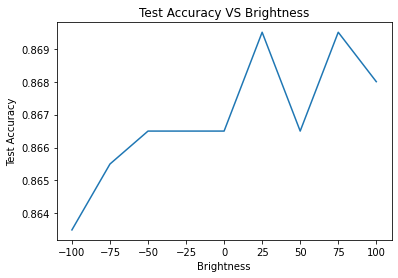

In [ ]:
plt.plot(brightness_list,accuracy_brightness_bw)
plt.title('Test Accuracy VS Brightness')
plt.xlabel('Brightness')
plt.ylabel('Test Accuracy')
plt.show()

## Logistic Regressions with different areas

In [ ]:
logreg = LogisticRegression(fit_intercept = False, solver = 'liblinear', C = 1, max_iter = 5000)

def predict_by_area(y1,y2,x1,x2):
  train_img_array = onp.zeros((15000, y2-y1,x2-x1))
  for k in range(15000):
      im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
      im = im[y1:y2,x1:x2]
      im = onp.mean(im, axis=2)
      train_img_array[k,:,:] = im
  test_img_array = onp.zeros((5000, y2-y1,x2-x1))
  for l in range(15000,20000):
      im2 = imageio.imread(os.path.join(path, all_img[l])).astype(float)
      im2 = im2[y1:y2,x1:x2]
      im2 = onp.mean(im2, axis=2)
      test_img_array[l-15000,:,:] = im2

  y_train=[]
  for k in range(15000):
    y_train.insert(k,attribute["Male"][k])
  y_train=np.asarray(y_train)

  y_test=[]
  for l in range(15000,20000):
    y_test.insert(l,attribute["Male"][l])
  y_test=np.asarray(y_test)

  number_of_train = train_img_array.shape[0]
  x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])

  number_of_test = test_img_array.shape[0]
  x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])

  x_train = x_train_flatten
  x_test = x_test_flatten
  y_test = y_test.T
  y_train = y_train.T

  model_log = logreg.fit(x_train, y_train)

  y_train_pred = logreg.predict(x_train)
  y_test_pred = logreg.predict(x_test)

  mnb_score = accuracy_score(y_test, y_test_pred)
  auc_score = roc_auc_score(y_test,y_test_pred)

  return (mnb_score,auc_socre)


In [ ]:
def predict_all():
  #eyes
  mnb_score,auc_socre = predict_by_area(105,120,50,122)
  print("eyes: "+"Accuracy - "+mnb_score + "AUC - "+auc_score)

  #mouth
  mnb_score,auc_socre = predict_by_area(142,165,60,120)
  print("mouth: "+"Accuracy - "+mnb_score + "AUC - "+auc_score)

  #nose
  mnb_score,auc_socre = predict_by_area(119,145,70,110)
  print("nose: "+"Accuracy - "+mnb_score + "AUC - "+auc_score)

  #left ear
  mnb_score,auc_socre = predict_by_area(105,140,25,55)
  print("left ear: "+"Accuracy - "+mnb_score + "AUC - "+auc_score)

  #chin
  mnb_score,auc_socre = predict_by_area(162,190,50,122)
  print("chin: "+"Accuracy - "+mnb_score + "AUC - "+auc_score)

  #eyebrows
  mnb_score,auc_socre = predict_by_area(95,109,50,122)
  print("eyebrow: "+"Accuracy - "+mnb_score + "AUC - "+auc_score)
















































































































































































































































































































































































































































































































































































































































# Ensemble of models

In [ ]:
#We used voting as the ensembling method, for demostration purpose, we use the first 200 images with 150 as training and 50 as test set, and the ensembled models
#are eyes and eyebrow area.

def predict_by_part_200(x1, x2, y1, y2):
  train_img_array = onp.zeros((6000, y2-y1, x2-x1))
  for k in range(6000):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = im[y1:y2,x1:x2]
    im = onp.mean(im, axis=2)
    train_img_array[k,:,:] = im

  test_img_array = onp.zeros((2000, y2-y1, x2-x1))
  for k in range(18000, 20000):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = im[y1:y2,x1:x2]
    im = onp.mean(im, axis=2)
    test_img_array[k-18000,:,:] = im

  y_train=[]
  for k in range(6000):
    y_train.insert(k,attribute["Male"][k])
  y_train=np.asarray(y_train)

  y_test=[]
  for l in range(18000,20000):
    y_test.insert(l,attribute["Male"][l])
  y_test=np.asarray(y_test)

  number_of_train = train_img_array.shape[0]
  x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])

  number_of_test = test_img_array.shape[0]
  x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])
  x_train = x_train_flatten
  x_test = x_test_flatten
  y_test = y_test.T
  y_train = y_train.T

  logreg = LogisticRegression(C= 1, max_iter= 5000, solver= 'liblinear')
  logreg.fit(x_train, y_train)
  y_train_pred = logreg.predict(x_train)
  y_test_pred = logreg.predict(x_test)
  print('Training accuracy: ', accuracy_score(y_train, y_train_pred))
  print('Training AUC: ', roc_auc_score(y_train, y_train_pred))
  print(classification_report(y_train, y_train_pred))
  print('Test accuracy: ', accuracy_score(y_test, y_test_pred))
  print('Test AUC: ', roc_auc_score(y_test, y_test_pred))
  print(classification_report(y_test, y_test_pred))
  return

In [ ]:
#We used voting as the ensembling method, for demostration purpose, we use the first 200 images with 150 as training and 50 as test set, and the ensembled models
#are eyes, eyebrow and mouth area models.

def predict_by_part_200_result(x1, x2, y1, y2):
  train_img_array = onp.zeros((6000, y2-y1, x2-x1))
  for k in range(6000):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = im[y1:y2,x1:x2]
    im = onp.mean(im, axis=2)
    train_img_array[k,:,:] = im

  test_img_array = onp.zeros((2000, y2-y1, x2-x1))
  for k in range(18000, 20000):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = im[y1:y2,x1:x2]
    im = onp.mean(im, axis=2)
    test_img_array[k-18000,:,:] = im

  y_train=[]
  for k in range(6000):
    y_train.insert(k,attribute["Male"][k])
  y_train=np.asarray(y_train)

  y_test=[]
  for l in range(18000,20000):
    y_test.insert(l,attribute["Male"][l])
  y_test=np.asarray(y_test)

  number_of_train = train_img_array.shape[0]
  x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])

  number_of_test = test_img_array.shape[0]
  x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])
  x_train = x_train_flatten
  x_test = x_test_flatten
  y_test = y_test.T
  y_train = y_train.T

  logreg = LogisticRegression(C= 1, max_iter= 5000, solver= 'liblinear')
  logreg.fit(x_train, y_train)
  y_train_pred = logreg.predict(x_train)
  y_test_pred = logreg.predict(x_test)
  return (y_train_pred,y_test_pred)

In [ ]:
print("##################eye##################")
predict_by_part_200(50,122,105,120)
predict_by_part_200_result(50,122,105,120)
print("##################eyebrow##############")
predict_by_part_200(50,122,95,109)
predict_by_part_200_result(50,122,95,109)
print("##################nose##############")
predict_by_part_200(119,145,70,110)
predict_by_part_200_result(119,145,70,110)

In [ ]:
eye_train_pred=predict_by_part_200_result(50,122,105,120)[0]
eye_test_pred=predict_by_part_200_result(50,122,105,120)[1]
eyebrow_train_pred=predict_by_part_200_result(50,122,95,109)[0]
eyebrow_test_pred=predict_by_part_200_result(50,122,95,109)[1]
nose_train_pred=predict_by_part_200_result(119,145,70,110)[0]
nose_test_pred=predict_by_part_200_result(119,145,70,110)[1]

In [ ]:
#We assign different weight to models based on their performance (accuracy).
ensemble_train_pred=1*eye_train_pred+1*eyebrow_train_pred+1*nose_train_pred
for i in range(0,6000):
  if ensemble_train_pred[i]>0:
    ensemble_train_pred[i]=1
  else:
    ensemble_train_pred[i]=-1
ensemble_test_pred=0.6*eye_test_pred+0.64*eyebrow_test_pred+0.56*nose_test_pred
for i in range(2000):
  if ensemble_test_pred[i]>0:
    ensemble_test_pred[i]=1
  else:
    ensemble_test_pred[i]=-1

In [ ]:
y_train=[]
for l in range(6000):
  y_train.insert(l,attribute["Male"][l])
y_train=np.asarray(y_train)
print('Train accuracy: ', accuracy_score(y_train, ensemble_train_pred))
print('Train AUC: ', roc_auc_score(y_train, ensemble_train_pred))

In [ ]:
y_test=[]
for l in range(18000,20000):
  y_test.insert(l,attribute["Male"][l])
y_test=np.asarray(y_test)
print('Test accuracy: ', accuracy_score(y_test, ensemble_test_pred))
print('Test AUC: ', roc_auc_score(y_test, ensemble_test_pred))

# Logistic Regression with 1% data

## Black & White baseline model

In [ ]:
train_img_array = onp.zeros((200, 100,100))
for k in range(200):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = resize(im, (100,100) )
    im = onp.mean(im, axis=2)
    train_img_array[k,:,:] = im
test_img_array = onp.zeros((5000, 100,100))
for l in range(15000,20000):
    im2 = imageio.imread(os.path.join(path, all_img[l])).astype(float)
    im2 = resize(im2, (100,100) )
    im2 = onp.mean(im2, axis=2)
    test_img_array[l-15000,:,:] = im2

In [ ]:
y_train=[]
for k in range(200):
   y_train.insert(k,attribute["Male"][k])
y_train=np.asarray(y_train)

In [ ]:
y_test=[]
for l in range(15000,20000):
  y_test.insert(l,attribute["Male"][l])
y_test=np.asarray(y_test)

In [ ]:
number_of_train = train_img_array.shape[0]
x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])

In [ ]:
number_of_test = test_img_array.shape[0]
x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])

In [ ]:
x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test.T
y_train = y_train.T

In [ ]:
logreg = LogisticRegression(C= 0.01, max_iter= 5000, solver= 'newton-cg')

In [ ]:
logreg.fit(x_train, y_train)

LogisticRegression(C=0.01, max_iter=5000, solver='newton-cg')

In [ ]:
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)
print('---test---')
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print('---train---')
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

---test---
0.7808
              precision    recall  f1-score   support

          -1       0.79      0.85      0.82      2901
           1       0.77      0.68      0.72      2099

    accuracy                           0.78      5000
   macro avg       0.78      0.77      0.77      5000
weighted avg       0.78      0.78      0.78      5000

---train---
1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        85

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
auc_score = roc_auc_score(y_test,y_test_pred)
auc_score

0.7675040674479515

In [ ]:
print('error rate: ', 1-accuracy_score(y_test, y_test_pred))

error rate:  0.21919999999999995


## Black & White by area (eyes and eyebrow)

In [ ]:
def predict_by_area_200(x1, x2, y1, y2):
  train_img_array = onp.zeros((200, y2-y1, x2-x1))
  for k in range(200):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = im[y1:y2,x1:x2]
    im = onp.mean(im, axis=2)
    train_img_array[k,:,:] = im

  test_img_array = onp.zeros((5000, y2-y1, x2-x1))
  for k in range(15000, 20000):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = im[y1:y2,x1:x2]
    im = onp.mean(im, axis=2)
    test_img_array[k-15000,:,:] = im

  y_train=[]
  for k in range(200):
    y_train.insert(k,attribute["Male"][k])
  y_train=np.asarray(y_train)

  y_test=[]
  for l in range(15000,20000):
    y_test.insert(l,attribute["Male"][l])
  y_test=np.asarray(y_test)

  number_of_train = train_img_array.shape[0]
  x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])

  number_of_test = test_img_array.shape[0]
  x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])
  x_train = x_train_flatten
  x_test = x_test_flatten
  y_test = y_test.T
  y_train = y_train.T

  logreg = LogisticRegression(C= 1, max_iter= 5000, solver= 'liblinear')
  logreg.fit(x_train, y_train)
  y_train_pred = logreg.predict(x_train)
  y_test_pred = logreg.predict(x_test)
  print('Training accuracy: ', accuracy_score(y_train, y_train_pred))
  print('Training AUC: ', roc_auc_score(y_train, y_train_pred))
  print(classification_report(y_train, y_train_pred))
  print('Test accuracy: ', accuracy_score(y_test, y_test_pred))
  print('Test AUC: ', roc_auc_score(y_test, y_test_pred))
  print(classification_report(y_test, y_test_pred))
  return

In [ ]:
print('Eyes area')
predict_by_area_200(50,122,105,120)

Eyes area
Training accuracy:  1.0
Training AUC:  1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        85

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Test accuracy:  0.8396
Test AUC:  0.8362203304572572
              precision    recall  f1-score   support

          -1       0.87      0.86      0.86      2901
           1       0.81      0.82      0.81      2099

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [ ]:
print('Eyebrow area')
predict_by_area_200(50,122,95,109)

Eyebrow area
Training accuracy:  1.0
Training AUC:  1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        85

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Test accuracy:  0.773
Test AUC:  0.7600578499733709
              precision    recall  f1-score   support

          -1       0.78      0.84      0.81      2901
           1       0.76      0.68      0.72      2099

    accuracy                           0.77      5000
   macro avg       0.77      0.76      0.76      5000
weighted avg       0.77      0.77      0.77      5000



## Colored and resolution 100×100

In [ ]:
logreg = LogisticRegression(fit_intercept = False, solver = 'liblinear', C = 1, max_iter = 3000)

train_img_array = onp.zeros((200, 100,100,3))
for k in range(200):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = resize(im, (100,100) )
    train_img_array[k,:,:,:] = im
test_img_array = onp.zeros((5000, 100,100,3))
for l in range(15000,20000):
    im2 = imageio.imread(os.path.join(path, all_img[l])).astype(float)
    im2 = resize(im2, (100,100) )
    test_img_array[l-15000,:,:,:] = im2


y_train=[]
for k in range(200):
  y_train.insert(k,attribute["Male"][k])
y_train=np.asarray(y_train)

y_test=[]
for l in range(15000,20000):
  y_test.insert(l,attribute["Male"][l])
y_test=np.asarray(y_test)

number_of_train = train_img_array.shape[0]
x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2]*3)

number_of_test = test_img_array.shape[0]
x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2]*3)

x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test.T
y_train = y_train.T

model_log = logreg.fit(x_train, y_train)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)
print("====================Train=============================")
mnb_score = accuracy_score(y_train, y_train_pred)
auc_score = roc_auc_score(y_train,y_train_pred)
print(mnb_score, auc_score)
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("====================Test=============================")
accuracy = accuracy_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test,y_test_pred)
print(accuracy, auc_score)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

error_rate=1-accuracy
print("test error rate:" + str(error_rate))

## Augmentation

(218, 178, 1)


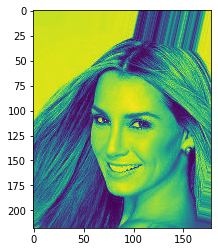

In [ ]:
img = load_img(os.path.join(path, all_img[0]), color_mode='grayscale')
plt.imshow(img)
img = img_to_array(img)
print(img.shape)

(100, 100, 1)


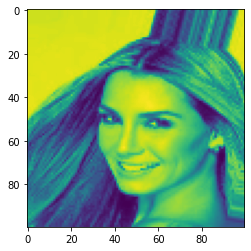

In [ ]:
img = resize(img, (100, 100))
print(img.shape)
plt.imshow(array_to_img(img))

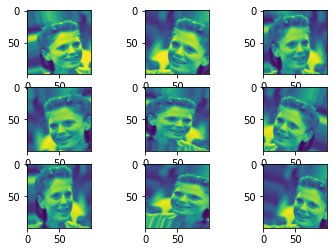

In [ ]:
img = load_img(os.path.join(path, all_img[1]), color_mode='grayscale')
sample = img_to_array(img)
sample = resize(sample, (100,100) )
sample = expand_dims(sample, 0)
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, height_shift_range=0.1,
                             width_shift_range=0.2, brightness_range=(0.75,1.15),
                             zoom_range=0.2)

it = datagen.flow(sample, batch_size=1)

for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = it.next()
  image = batch[0].astype('uint8')
  img_to_array(image)
  plt.imshow(array_to_img(image))
plt.show()

In [ ]:
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, height_shift_range=0.1,
                             width_shift_range=0.2, brightness_range=(0.75,1.15),
                             zoom_range=0.2)

#augment each image 9 times
train_img_array = onp.zeros((2000,100,100,1))
for k in range(200):
  im = load_img(os.path.join(path, all_img[i]),color_mode='grayscale')
  im = img_to_array(im)
  im = resize(im, (100,100) )
  train_img_array[k*10,:,:,:] = im
  sample = expand_dims(im, 0)

  for i in range(9):
    it = datagen.flow(sample, batch_size=1)
    batch = it.next()
    image = batch[0].astype('uint8')
    image = img_to_array(image)
    train_img_array[k*10 + i + 1,:,:,:] = image


test_img_array = onp.zeros((5000,100,100,1))
for l in range(15000,20000):
  im = load_img(os.path.join(path, all_img[l]),color_mode='grayscale')
  im = img_to_array(im)
  im = resize(im, (100,100) )
  test_img_array[l-15000,:,:,:] = im

In [ ]:
ls = [1]
ls.extend([attribute["Male"][0]]*10)
ls

[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [ ]:
y_train=[]
for k in range(200):
  labels = [attribute["Male"][k]]*10
  y_train.extend(labels)
y_train = np.asarray(y_train)

In [ ]:
y_train.shape

(2000,)

In [ ]:
y_test=[]
for l in range(15000,20000):
  y_test.insert(l,attribute["Male"][l])
y_test=np.asarray(y_test)

In [ ]:
number_of_train = train_img_array.shape[0]
x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])

In [ ]:
number_of_test = test_img_array.shape[0]
x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])

In [ ]:
x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test.T
y_train = y_train.T

In [ ]:
x_train_flatten.shape

(2000, 10000)

In [ ]:
y_train.shape

(2000,)

In [ ]:
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)
print("====================Train=============================")
mnb_score = accuracy_score(y_train, y_train_pred)
auc_score = roc_auc_score(y_train,y_train_pred)
print(mnb_score, auc_score)
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("====================Test=============================")
mnb_score = accuracy_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test,y_test_pred)
print(mnb_score, auc_score)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

====================Train=============================
0.9575 0.95
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96      1150
           1       1.00      0.90      0.95       850

    accuracy                           0.96      2000
   macro avg       0.97      0.95      0.96      2000
weighted avg       0.96      0.96      0.96      2000

[[1150    0]
 [  85  765]]
====================Test=============================
0.5598 0.5347081775451911
              precision    recall  f1-score   support

          -1       0.61      0.69      0.65      2901
           1       0.47      0.38      0.42      2099

    accuracy                           0.56      5000
   macro avg       0.54      0.53      0.53      5000
weighted avg       0.55      0.56      0.55      5000

[[2005  896]
 [1305  794]]


##Ensemble with 1% data

In [ ]:
def predict_by_part_200(x1, x2, y1, y2):
  train_img_array = onp.zeros((200, y2-y1, x2-x1))
  for k in range(200):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = im[y1:y2,x1:x2]
    im = onp.mean(im, axis=2)
    train_img_array[k,:,:] = im

  test_img_array = onp.zeros((5000, y2-y1, x2-x1))
  for k in range(15000, 20000):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = im[y1:y2,x1:x2]
    im = onp.mean(im, axis=2)
    test_img_array[k-15000,:,:] = im

  y_train=[]
  for k in range(200):
    y_train.insert(k,attribute["Male"][k])
  y_train=np.asarray(y_train)

  y_test=[]
  for l in range(15000,20000):
    y_test.insert(l,attribute["Male"][l])
  y_test=np.asarray(y_test)

  number_of_train = train_img_array.shape[0]
  x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])

  number_of_test = test_img_array.shape[0]
  x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])
  x_train = x_train_flatten
  x_test = x_test_flatten
  y_test = y_test.T
  y_train = y_train.T

  logreg = LogisticRegression(C= 1, max_iter= 5000, solver= 'liblinear')
  logreg.fit(x_train, y_train)
  y_train_pred = logreg.predict(x_train)
  y_test_pred = logreg.predict(x_test)
  print('Training accuracy: ', accuracy_score(y_train, y_train_pred))
  print('Training AUC: ', roc_auc_score(y_train, y_train_pred))
  print(classification_report(y_train, y_train_pred))
  print('Test accuracy: ', accuracy_score(y_test, y_test_pred))
  print('Test AUC: ', roc_auc_score(y_test, y_test_pred))
  print(classification_report(y_test, y_test_pred))
  return

In [ ]:
def predict_by_part_200_result(x1, x2, y1, y2):
  train_img_array = onp.zeros((200, y2-y1, x2-x1))
  for k in range(200):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = im[y1:y2,x1:x2]
    im = onp.mean(im, axis=2)
    train_img_array[k,:,:] = im

  test_img_array = onp.zeros((5000, y2-y1, x2-x1))
  for k in range(15000, 20000):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = im[y1:y2,x1:x2]
    im = onp.mean(im, axis=2)
    test_img_array[k-15000,:,:] = im

  y_train=[]
  for k in range(200):
    y_train.insert(k,attribute["Male"][k])
  y_train=np.asarray(y_train)

  y_test=[]
  for l in range(15000,20000):
    y_test.insert(l,attribute["Male"][l])
  y_test=np.asarray(y_test)

  number_of_train = train_img_array.shape[0]
  x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])

  number_of_test = test_img_array.shape[0]
  x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])
  x_train = x_train_flatten
  x_test = x_test_flatten
  y_test = y_test.T
  y_train = y_train.T

  logreg = LogisticRegression(C= 1, max_iter= 5000, solver= 'liblinear')
  logreg.fit(x_train, y_train)
  y_train_pred = logreg.predict(x_train)
  y_test_pred = logreg.predict(x_test)
  return (y_train_pred,y_test_pred)

In [ ]:
eye_train_pred=predict_by_part_200_result(50,122,105,120)[0]
eye_test_pred=predict_by_part_200_result(50,122,105,120)[1]
eyebrow_train_pred=predict_by_part_200_result(50,122,95,109)[0]
eyebrow_test_pred=predict_by_part_200_result(50,122,95,109)[1]
nose_train_pred=predict_by_part_200_result(119,145,70,110)[0]
nose_test_pred=predict_by_part_200_result(119,145,70,110)[1]

In [ ]:
ensemble_train_pred=1*eye_train_pred+1*eyebrow_train_pred+1*nose_train_pred
for i in range(0,200):
  if ensemble_train_pred[i]>0:
    ensemble_train_pred[i]=1
  else:
    ensemble_train_pred[i]=-1
ensemble_test_pred=0.6*eye_test_pred+0.64*eyebrow_test_pred+0.56*nose_test_pred
for i in range(0,5000):
  if ensemble_test_pred[i]>0:
    ensemble_test_pred[i]=1
  else:
    ensemble_test_pred[i]=-1

In [ ]:
y_train=[]
for l in range(200):
  y_train.insert(l,attribute["Male"][l])
y_train=np.asarray(y_train)
print('Train accuracy: ', accuracy_score(y_train, ensemble_train_pred))
print('Train AUC: ', roc_auc_score(y_train, ensemble_train_pred))

Train accuracy:  1.0
Test AUC:  1.0


In [ ]:
y_test=[]
for l in range(15000,20000):
  y_test.insert(l,attribute["Male"][l])
y_test=np.asarray(y_test)
print('Test accuracy: ', accuracy_score(y_test, ensemble_test_pred))
print('Test AUC: ', roc_auc_score(y_test, ensemble_test_pred))

Test accuracy:  0.8096
Test AUC:  0.8012792815606782
